In [2]:
from IPython.display import Image

# 1 Cats and dogs

## 1.1 케글에서 데이터 받기

## 1.2 용량 높음

In [3]:
Image

IPython.core.display.Image

## 1.3 머신러닝때 했던 Cats and dogs

In [4]:
import os

path = "./dogs-vs-cats/train/"
os.listdir(path)

['dog.1554.jpg',
 'cat.12183.jpg',
 'cat.4587.jpg',
 'dog.11286.jpg',
 'cat.11117.jpg',
 'cat.3255.jpg',
 'cat.6791.jpg',
 'cat.2305.jpg',
 'cat.7703.jpg',
 'cat.447.jpg',
 'cat.8214.jpg',
 'dog.3683.jpg',
 'dog.7776.jpg',
 'cat.1116.jpg',
 'cat.8297.jpg',
 'dog.2220.jpg',
 'dog.10885.jpg',
 'cat.10994.jpg',
 'dog.9651.jpg',
 'cat.11220.jpg',
 'cat.3528.jpg',
 'dog.7630.jpg',
 'cat.9609.jpg',
 'dog.10408.jpg',
 'dog.9135.jpg',
 'dog.595.jpg',
 'dog.7747.jpg',
 'dog.4657.jpg',
 'cat.3087.jpg',
 'cat.8304.jpg',
 'cat.8104.jpg',
 'cat.2461.jpg',
 'cat.1619.jpg',
 'cat.3577.jpg',
 'dog.11695.jpg',
 'dog.12197.jpg',
 'dog.8454.jpg',
 'cat.3339.jpg',
 'cat.11637.jpg',
 'cat.3958.jpg',
 'dog.10622.jpg',
 'cat.1354.jpg',
 'dog.10388.jpg',
 'dog.7401.jpg',
 'dog.27.jpg',
 'dog.5877.jpg',
 'cat.7244.jpg',
 'cat.10761.jpg',
 'cat.2557.jpg',
 'cat.3256.jpg',
 'dog.3078.jpg',
 'dog.4365.jpg',
 'cat.9349.jpg',
 'dog.10269.jpg',
 'dog.9156.jpg',
 'dog.3430.jpg',
 'cat.1234.jpg',
 'dog.9326.jpg',
 'ca

## 1.4 이런 데이터

In [5]:
import random

full_names = os.listdir(path)
full_names = random.choices(full_names, k=10000)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

In [19]:
len(full_names)

10000

## 1.5 약간은 난감했던 그 데이터

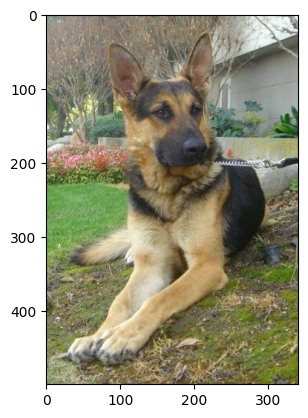

In [6]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

sample = random.choice(full_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()

## 1.6 사진 크기도 제각각이었고

In [7]:
sample = random.choice(full_names)
image =mpimg.imread(path + sample)
image.shape

(274, 500, 3)

## 1.7 그래서 크기는 하나로 고정하고
## 1.8 이렇게

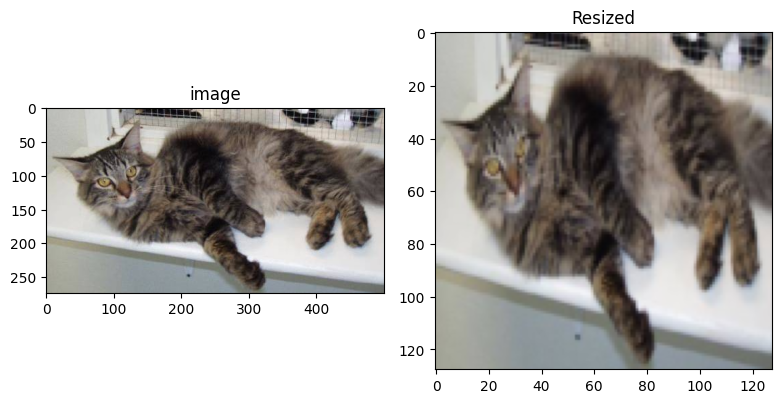

In [8]:
from skimage.transform import resize
resized = resize(image, (128,128,3))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("image")
ax[1].imshow(resized, cmap=plt.cm.gray)
ax[1].set_title("Resized")

fig.tight_layout()
plt.show()

## 1.9 일단 크기 바꿔서 다 일고

In [9]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

images = []
bar_total = tqdm(full_names)
for file in bar_total:
    image = mpimg.imread(path + file)
    images.append(resize(image, (128,128,3)))

images = np.array(images)

  0%|          | 0/10000 [00:00<?, ?it/s]

## 1.10 이렇게 생긴 아이를

In [10]:
images.shape, labels[:3]

((10000, 128, 128, 3), ['cat', 'dog', 'dog'])

In [11]:
images[:3]

array([[[[0.35003897, 0.37356827, 0.46768597],
         [0.35157684, 0.37355151, 0.46844645],
         [0.37912026, 0.39210192, 0.49012389],
         ...,
         [0.39582643, 0.40366957, 0.50170879],
         [0.33027046, 0.33811359, 0.43615281],
         [0.33380873, 0.34165186, 0.43969108]],

        [[0.37280461, 0.39749151, 0.49103041],
         [0.29966134, 0.32279374, 0.41710989],
         [0.3173001 , 0.33361668, 0.43128678],
         ...,
         [0.35989472, 0.36889546, 0.46693467],
         [0.33346066, 0.3424614 , 0.44050061],
         [0.33539241, 0.34439315, 0.44243236]],

        [[0.36062639, 0.39419207, 0.48366101],
         [0.33017982, 0.36033605, 0.45114403],
         [0.32020659, 0.34238264, 0.43717694],
         ...,
         [0.30816555, 0.32554048, 0.4227237 ],
         [0.33491016, 0.3522851 , 0.44946831],
         [0.29666267, 0.3140376 , 0.41122082]],

        ...,

        [[0.46949997, 0.54923405, 0.67653783],
         [0.47713458, 0.55935444, 0.68121938]

## 1.11 Label 인코딩 하고

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([0, 1, 1]), array(['cat', 'dog'], dtype='<U3'))

## 1.12 데이터 나누고

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
            train_test_split(images, labels_encoded, test_size=0.2,
                             random_state=13, stratify=labels_encoded)

X_train.shape, X_test.shape

((8000, 128, 128, 3), (2000, 128, 128, 3))

## 1.13 어떤 놈들이냐면

## 1.14 정말 제 각각인 이미지들

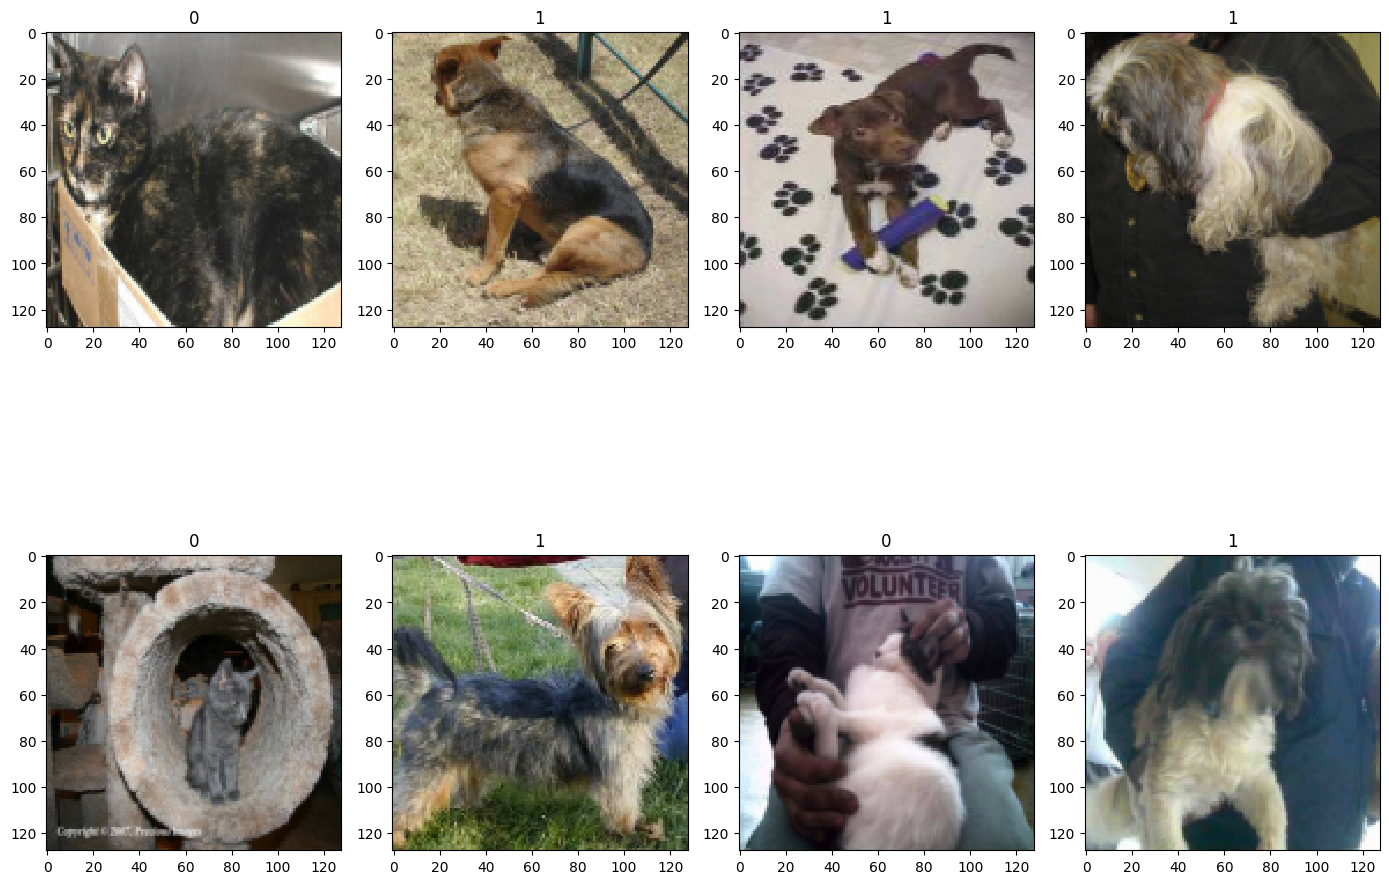

In [14]:
samples = random.choices(population=range(0,2000), k=8)

plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
    plt.subplot(2, 4, idx+1)
    plt.imshow(X_train[n], cmap='Greys',
               interpolation='nearest')
    plt.title(y_train[n])

plt.tight_layout()
plt.show()

## 1.15 모델 만들고
## 1.16 상세

In [15]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation='softmax')
])

model.summary()

2022-11-28 14:41:32.045492: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-28 14:41:32.271922: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-28 14:41:33.251411: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.3/lib64
2022-11-28 14:41:33.251763: W tensorflow/compiler/xla/strea

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 31, 31, 64)        0

## 1.17 컴파일 하고 학습

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## 1.18 시간도 오래걸림

In [17]:
import time

start_time = time.time()
hist = model.fit(X_train.reshape(8000,128,128,3), y_train, epochs=5, verbose=1, validation_data = (X_test.reshape(2000,128,128,3), y_test))
print("fit time : ", time.time() - start_time)

Epoch 1/5


2022-11-28 14:41:42.461143: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2022-11-28 14:41:43.450429: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8201
2022-11-28 14:41:46.198322: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-11-28 14:41:46.214916: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fae6c4fa970 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-11-28 14:41:46.214972: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2022-11-28 14:41:46.231128: I tensorflow/compiler/mlir/tensorflow/utils/du

250/250 [==============================] - 12s 22ms/step - loss: 0.7285 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 2/5
250/250 [==============================] - 5s 19ms/step - loss: 0.6912 - accuracy: 0.5219 - val_loss: 0.6845 - val_accuracy: 0.5145
Epoch 3/5
250/250 [==============================] - 5s 19ms/step - loss: 0.6660 - accuracy: 0.5985 - val_loss: 0.6557 - val_accuracy: 0.5980
Epoch 4/5
250/250 [==============================] - 5s 19ms/step - loss: 0.6017 - accuracy: 0.6655 - val_loss: 0.5916 - val_accuracy: 0.6900
Epoch 5/5
250/250 [==============================] - 5s 18ms/step - loss: 0.5613 - accuracy: 0.7094 - val_loss: 0.5600 - val_accuracy: 0.7270
fit time :  33.741835832595825


## 1.19 좀 더 하면 될까?
## 1.20 그래프

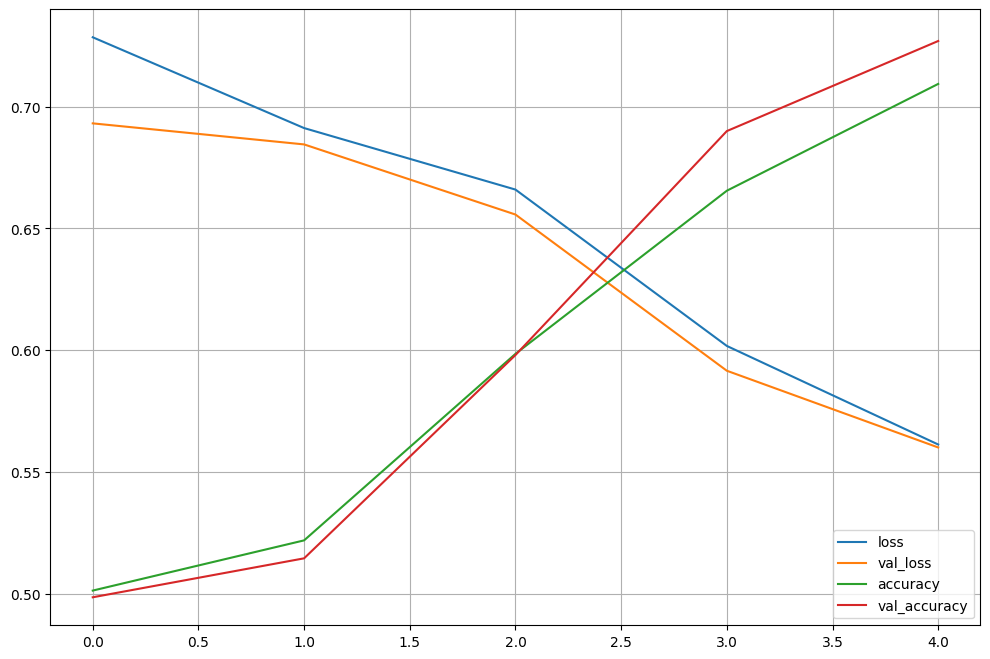

In [18]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()